In [28]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reggresion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error,r2_score

#application
import tkinter as tk
from tkinter import ttk
import joblib

# Define the connection details
server = 'DatabaseName'
database = 'Training'
trusted_connection = 'yes'


# Establish a connection
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    f'SERVER={server};DATABASE={database};'
    'Trusted_Connection=yes;'

)

# SQL query to retrieve data
query = 'SELECT * FROM [dbo.automation_stage];'

# Fetch data into a DataFrame
df = pd.read_sql(query, conn)



c:\Users\GEETHAN\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [2]:

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    int64  
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140,3449,10.5,70,usa


In [3]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

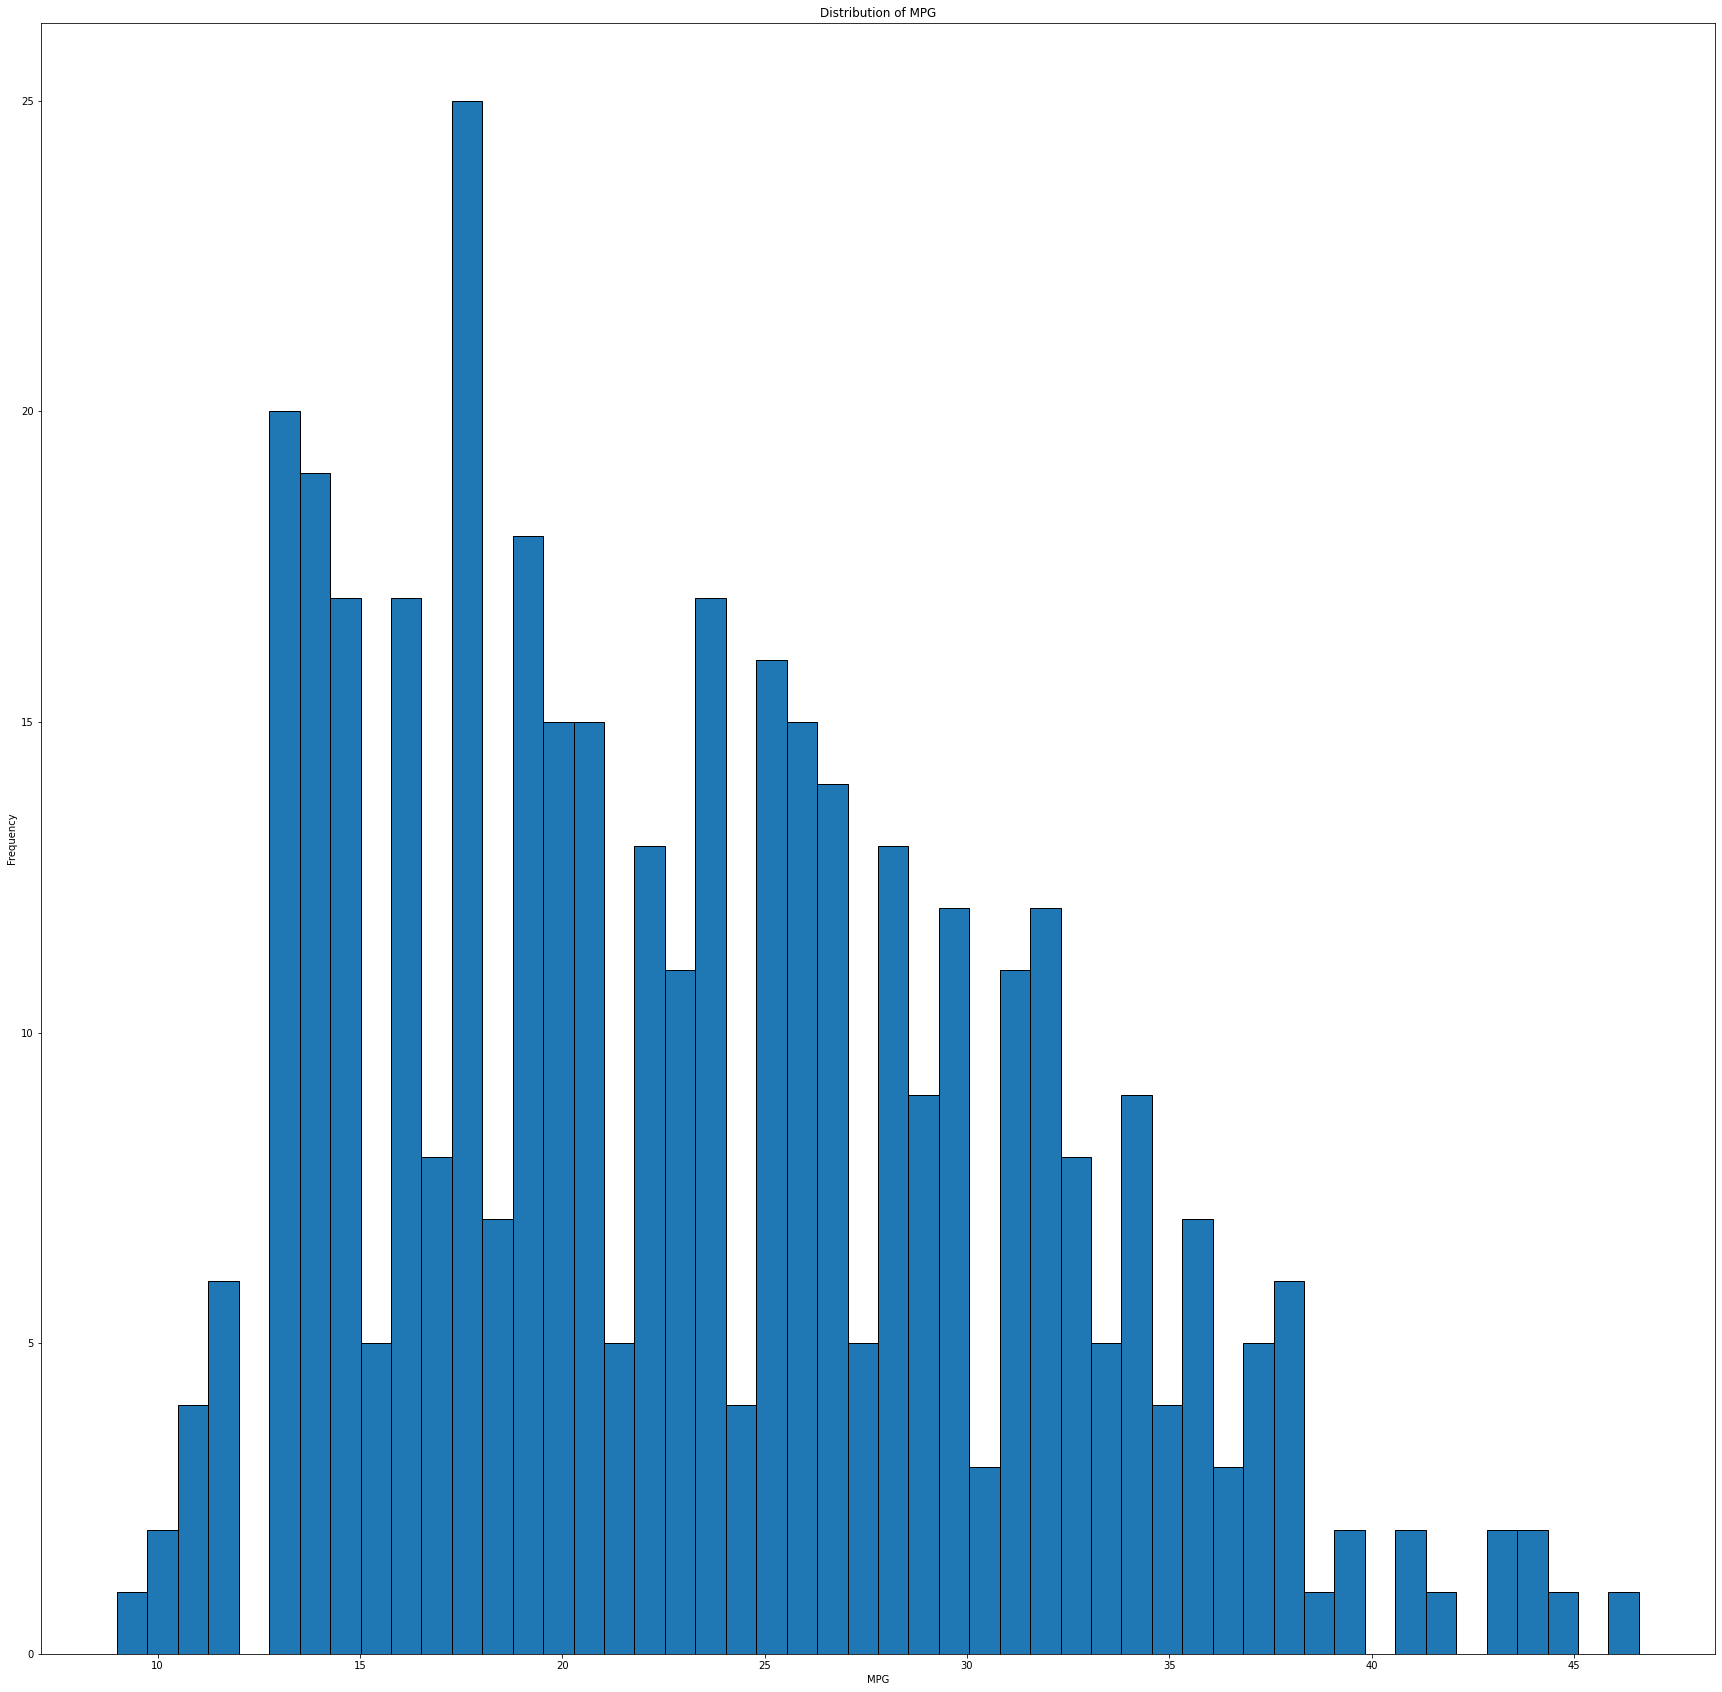

In [11]:
# histogram of the MPG 
plt.figure(figsize=(30, 30))
plt.hist(df['mpg'], bins=50, edgecolor='k')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.show()

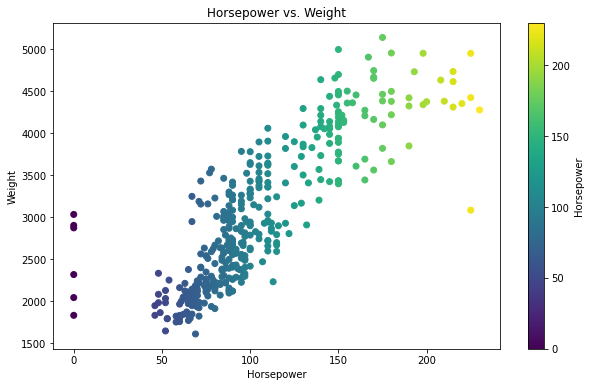

In [5]:

# Plot scatter plot with colors based on 'horsepower'
plt.figure(figsize=(10, 6))
plt.scatter(df['horsepower'], df['weight'], c=df['horsepower'], cmap='viridis')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.title('Horsepower vs. Weight')
plt.colorbar(label='Horsepower')
plt.show()


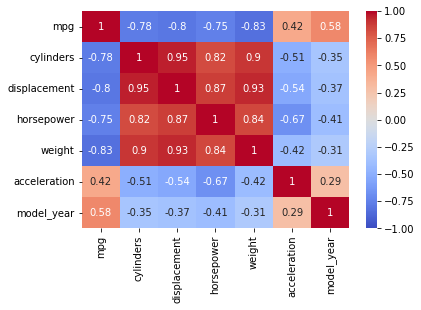

In [5]:
cor_matrix = df.corr()

sns.heatmap(cor_matrix,annot=True, cmap = 'coolwarm',vmin=-1,vmax=1)
plt.show()

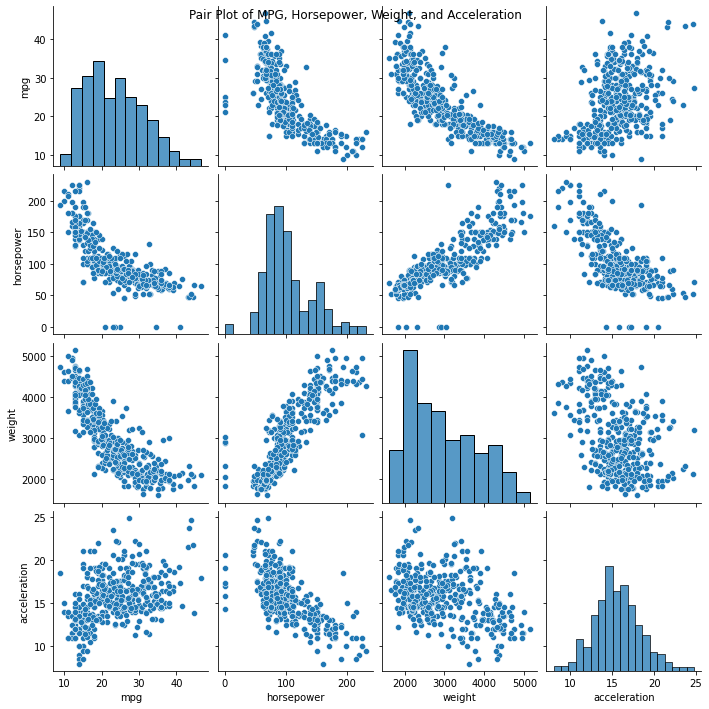

In [6]:
import seaborn as sns

# Assuming 'df' is your pandas DataFrame containing the dataset
sns.pairplot(df[['mpg', 'horsepower', 'weight', 'acceleration']])
plt.suptitle('Pair Plot of MPG, Horsepower, Weight, and Acceleration')
plt.show()


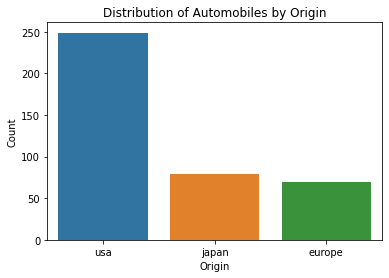

In [7]:
sns.countplot(x='origin', data=df)
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Distribution of Automobiles by Origin')
plt.show()


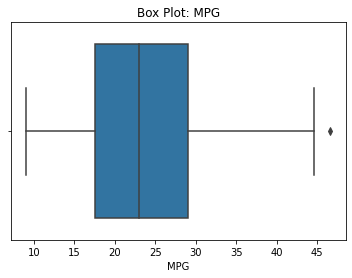

In [8]:
sns.boxplot(x=df['mpg'])
plt.xlabel('MPG')
plt.title('Box Plot: MPG')
plt.show()


In [10]:
df['power_to_weight_ratio'] = df['horsepower'] / df['weight']

df['power_to_weight_ratio']

0      0.037100
1      0.044679
2      0.043655
3      0.043694
4      0.040591
         ...   
393    0.030824
394    0.024413
395    0.036601
396    0.030095
397    0.030147
Name: power_to_weight_ratio, Length: 398, dtype: float64

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df[['mpg', 'horsepower', 'weight']])


In [12]:
reduced_data

array([[ 5.34258247e+02,  5.87451344e+00],
       [ 7.24520116e+02,  3.33551966e+01],
       [ 4.67111097e+02,  2.85710240e+01],
       [ 4.64128910e+02,  2.87683150e+01],
       [ 4.79709637e+02,  1.81035450e+01],
       [ 1.37330131e+03,  4.03133721e+01],
       [ 1.38717481e+03,  6.17964215e+01],
       [ 1.34501018e+03,  5.84887407e+01],
       [ 1.45831556e+03,  6.39409334e+01],
       [ 8.82386894e+02,  5.20193915e+01],
       [ 5.94826381e+02,  4.35616717e+01],
       [ 6.40397746e+02,  3.17705867e+01],
       [ 7.91866479e+02,  1.56509560e+01],
       [ 1.20418198e+02,  1.17647246e+02],
       [-5.98250091e+02,  1.61014271e+01],
       [-1.37614374e+02, -2.31198318e+00],
       [-1.96455417e+02,  2.20529803e+00],
       [-3.83802552e+02, -2.39116135e+00],
       [-8.40352722e+02,  1.87032476e+01],
       [-1.13677551e+03, -1.13611047e+01],
       [-2.98823549e+02, -3.95746752e+00],
       [-5.40497067e+02,  8.78281939e+00],
       [-5.95260233e+02,  1.59426177e+01],
       [-7.

In [22]:

X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
Y = df['mpg']

# Split the data into 80% training and 20% testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=42)


In [26]:
# Create the Linear Regression model and fit it to the training data
reg_model = LR()
reg_model.fit(X_train, Y_train)

# Predict MPG on the test set
y_pred = reg_model.predict(X_test)

# Calculate mean squared error and R-squared (coefficient of determination) to evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)




Mean Squared Error: 15.035703012641028
R-squared: 0.7203515462483585


In [27]:
# Get the coefficients (weights) of each predictor
coefficients = pd.Series(reg_model.coef_, index=X.columns)

# Sort the coefficients in descending order to identify the most significant predictors
significant_predictors = coefficients.abs().sort_values(ascending=False)

print("Most significant predictors:")
print(significant_predictors)


Most significant predictors:
cylinders       0.129858
horsepower      0.036594
acceleration    0.019103
displacement    0.007379
weight          0.005339
dtype: float64


In [ ]:
# Save the model
joblib.dump(reg_model, 'your/path/saved_model.pkl')

# Load the model 
reg_model = joblib.load('your/path/saved_model.pkl')


In [35]:
root = tk.Tk()
root.title("Linear Regression Predictor")

def predict_mpg():
    try:
        # Get user inputs from Entry widgets
        user_inputs = [float(entry.get()) for entry in input_entries]
        
        # Perform the prediction using the model
        predicted_mpg = reg_model.predict([user_inputs])
        
        # Display the predicted MPG in the output label
        output_label.config(text=f"Predicted MPG: {predicted_mpg[0]:.2f}")
    except ValueError:
        output_label.config(text="Invalid input! Please enter numeric values.")
        
# Create input labels and Entry widgets for each feature
input_labels = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']
input_entries = []

for i, label_text in enumerate(input_labels):
    label = ttk.Label(root, text=label_text)
    label.grid(row=i, column=0, padx=10, pady=5)
    
    entry = ttk.Entry(root)
    entry.grid(row=i, column=1, padx=10, pady=5)
    input_entries.append(entry)

# Create a Predict button to trigger the prediction
predict_button = ttk.Button(root, text="Predict", command=predict_mpg)
predict_button.grid(row=len(input_labels), column=0, columnspan=2, padx=10, pady=10)

# Create an output label to display the predicted MPG
output_label = ttk.Label(root, text="")
output_label.grid(row=len(input_labels)+1, column=0, columnspan=2, padx=10, pady=5)

# Start the GUI event loop
root.mainloop()


